In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm, neighbors
from mlxtend.plotting import plot_decision_regions
import plotly
import plotly.plotly as py

plt.rcParams['figure.figsize'] = (40.0, 20.0)
%matplotlib inline

In [2]:
#Read dataset
names = ['state', 'account_len', 'area_code', 'phone', 'intl_plan', 'vmail_plan', 'vmail_msg', 'day_mins', 'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge', 'intl_mins', 'intl_calls', 'int_charge', 'custserv_calls', 'churn']

#df_orig = pd.read_csv('https://github.com/jgoodz8/3250-churn-4/blob/master/customer_churn.csv',  
#                      header = 0, names = names)

df_orig = pd.read_csv('customer_churn.csv',
                      names = names, header = 0)
#df_orig.iloc[:20]

In [3]:
df_orig.describe()

account_len    area_code    vmail_msg     day_mins    day_calls  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean    101.064806   437.182418     8.099010   179.775098   100.435644   
std      39.822106    42.371290    13.688365    54.467389    20.069084   
min       1.000000   408.000000     0.000000     0.000000     0.000000   
25%      74.000000   408.000000     0.000000   143.700000    87.000000   
50%     101.000000   415.000000     0.000000   179.400000   101.000000   
75%     127.000000   510.000000    20.000000   216.400000   114.000000   
max     243.000000   510.000000    51.000000   350.800000   165.000000   

        day_charge     eve_mins    eve_calls   eve_charge   night_mins  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean     30.562307   200.980348   100.114311    17.083540   200.872037   
std       9.259435    50.713844    19.922625     4.310668    50.573847   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.430000   166.600000    87.000000    14.160000   167.000000   
50%      30.500000   201.400000   100.000000    17.120000   201.200000   
75%      36.790000   235.300000   114.000000    20.000000   235.300000   
max      59.640000   363.700000   170.000000    30.910000   395.000000   

       night_calls  night_charge    intl_mins   intl_calls   int_charge  \
count  3333.000000   3333.000000  3333.000000  3333.000000  3333.000000   
mean    100.107711      9.039325    10.237294     4.479448     2.764581   
std      19.568609      2.275873     2.791840     2.461214     0.753773   
min      33.000000      1.040000     0.000000     0.000000     0.000000   
25%      87.000000      7.520000     8.500000     3.000000     2.300000   
50%     100.000000      9.050000    10.300000     4.000000     2.780000   
75%     113.000000     10.590000    12.100000     6.000000     3.270000   
max     175.000000     17.770000    20.000000    20.000000     5.400000   

       custserv_calls  
count     3333.000000  
mean         1.562856  
std          1.315491  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

In [4]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state             3333 non-null object
account_len       3333 non-null int64
area_code         3333 non-null int64
phone             3333 non-null object
intl_plan         3333 non-null object
vmail_plan        3333 non-null object
vmail_msg         3333 non-null int64
day_mins          3333 non-null float64
day_calls         3333 non-null int64
day_charge        3333 non-null float64
eve_mins          3333 non-null float64
eve_calls         3333 non-null int64
eve_charge        3333 non-null float64
night_mins        3333 non-null float64
night_calls       3333 non-null int64
night_charge      3333 non-null float64
intl_mins         3333 non-null float64
intl_calls        3333 non-null int64
int_charge        3333 non-null float64
custserv_calls    3333 non-null int64
churn             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [5]:
#Create copy of dataframe
df = df_orig.copy()
df.head()

state  account_len  area_code     phone intl_plan vmail_plan  vmail_msg  \
0    KS          128        415  382-4657        no        yes         25   
1    OH          107        415  371-7191        no        yes         26   
2    NJ          137        415  358-1921        no         no          0   
3    OH           84        408  375-9999       yes         no          0   
4    OK           75        415  330-6626       yes         no          0   

   day_mins  day_calls  day_charge   ...    eve_calls  eve_charge  night_mins  \
0     265.1        110       45.07   ...           99       16.78       244.7   
1     161.6        123       27.47   ...          103       16.62       254.4   
2     243.4        114       41.38   ...          110       10.30       162.6   
3     299.4         71       50.90   ...           88        5.26       196.9   
4     166.7        113       28.34   ...          122       12.61       186.9   

   night_calls  night_charge  intl_mins  intl_calls  int_charge  \
0           91         11.01       10.0           3        2.70   
1          103         11.45       13.7           3        3.70   
2          104          7.32       12.2           5        3.29   
3           89          8.86        6.6           7        1.78   
4          121          8.41       10.1           3        2.73   

   custserv_calls   churn  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

In [6]:
#Check churn values
df.churn.value_counts()

False.    2850
True.      483
Name: churn, dtype: int64

In [7]:
#Change churn to flag
df['churn'] = df.churn.map({'True.': 1, 'False.': 0})

#Check for correct mapping
#df.iloc[:20]
#print('--------------------------')
#df.churn.value_counts()

In [8]:
#Create aggregated state dataset

#state_df = df.groupby('state').agg({'churn': 'sum'}).apply(lambda x: 100 * x / x.size())
#state_df = df.groupby('state')['churn'].sum()
#state_df.astype(int)

state_df = pd.crosstab(df['state'],df['churn'])

state_df['churn'] = state_df[1] / state_df.sum(axis=1)

state_df

churn   0   1     churn
state                  
AK     49   3  0.057692
AL     72   8  0.100000
AR     44  11  0.200000
AZ     60   4  0.062500
CA     25   9  0.264706
CO     57   9  0.136364
CT     62  12  0.162162
DC     49   5  0.092593
DE     52   9  0.147541
FL     55   8  0.126984
GA     46   8  0.148148
HI     50   3  0.056604
IA     41   3  0.068182
ID     64   9  0.123288
IL     53   5  0.086207
IN     62   9  0.126761
KS     57  13  0.185714
KY     51   8  0.135593
LA     47   4  0.078431
MA     54  11  0.169231
MD     53  17  0.242857
ME     49  13  0.209677
MI     57  16  0.219178
MN     69  15  0.178571
MO     56   7  0.111111
MS     51  14  0.215385
MT     54  14  0.205882
NC     57  11  0.161765
ND     56   6  0.096774
NE     56   5  0.081967
NH     47   9  0.160714
NJ     50  18  0.264706
NM     56   6  0.096774
NV     52  14  0.212121
NY     68  15  0.180723
OH     68  10  0.128205
OK     52   9  0.147541
OR     67  11  0.141026
PA     37   8  0.177778
RI     59   6  0.092308
SC     46  14  0.233333
SD     52   8  0.133333
TN     48   5  0.094340
TX     54  18  0.250000
UT     62  10  0.138889
VA     72   5  0.064935
VT     65   8  0.109589
WA     52  14  0.212121
WI     71   7  0.089744
WV     96  10  0.094340
WY     68   9  0.116883

In [9]:
#Visualize state data
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_df.index,
        z = state_df.churn,
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Churn Percentage")
        ) ]

layout = dict(
        title = 'Churn Percentage by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

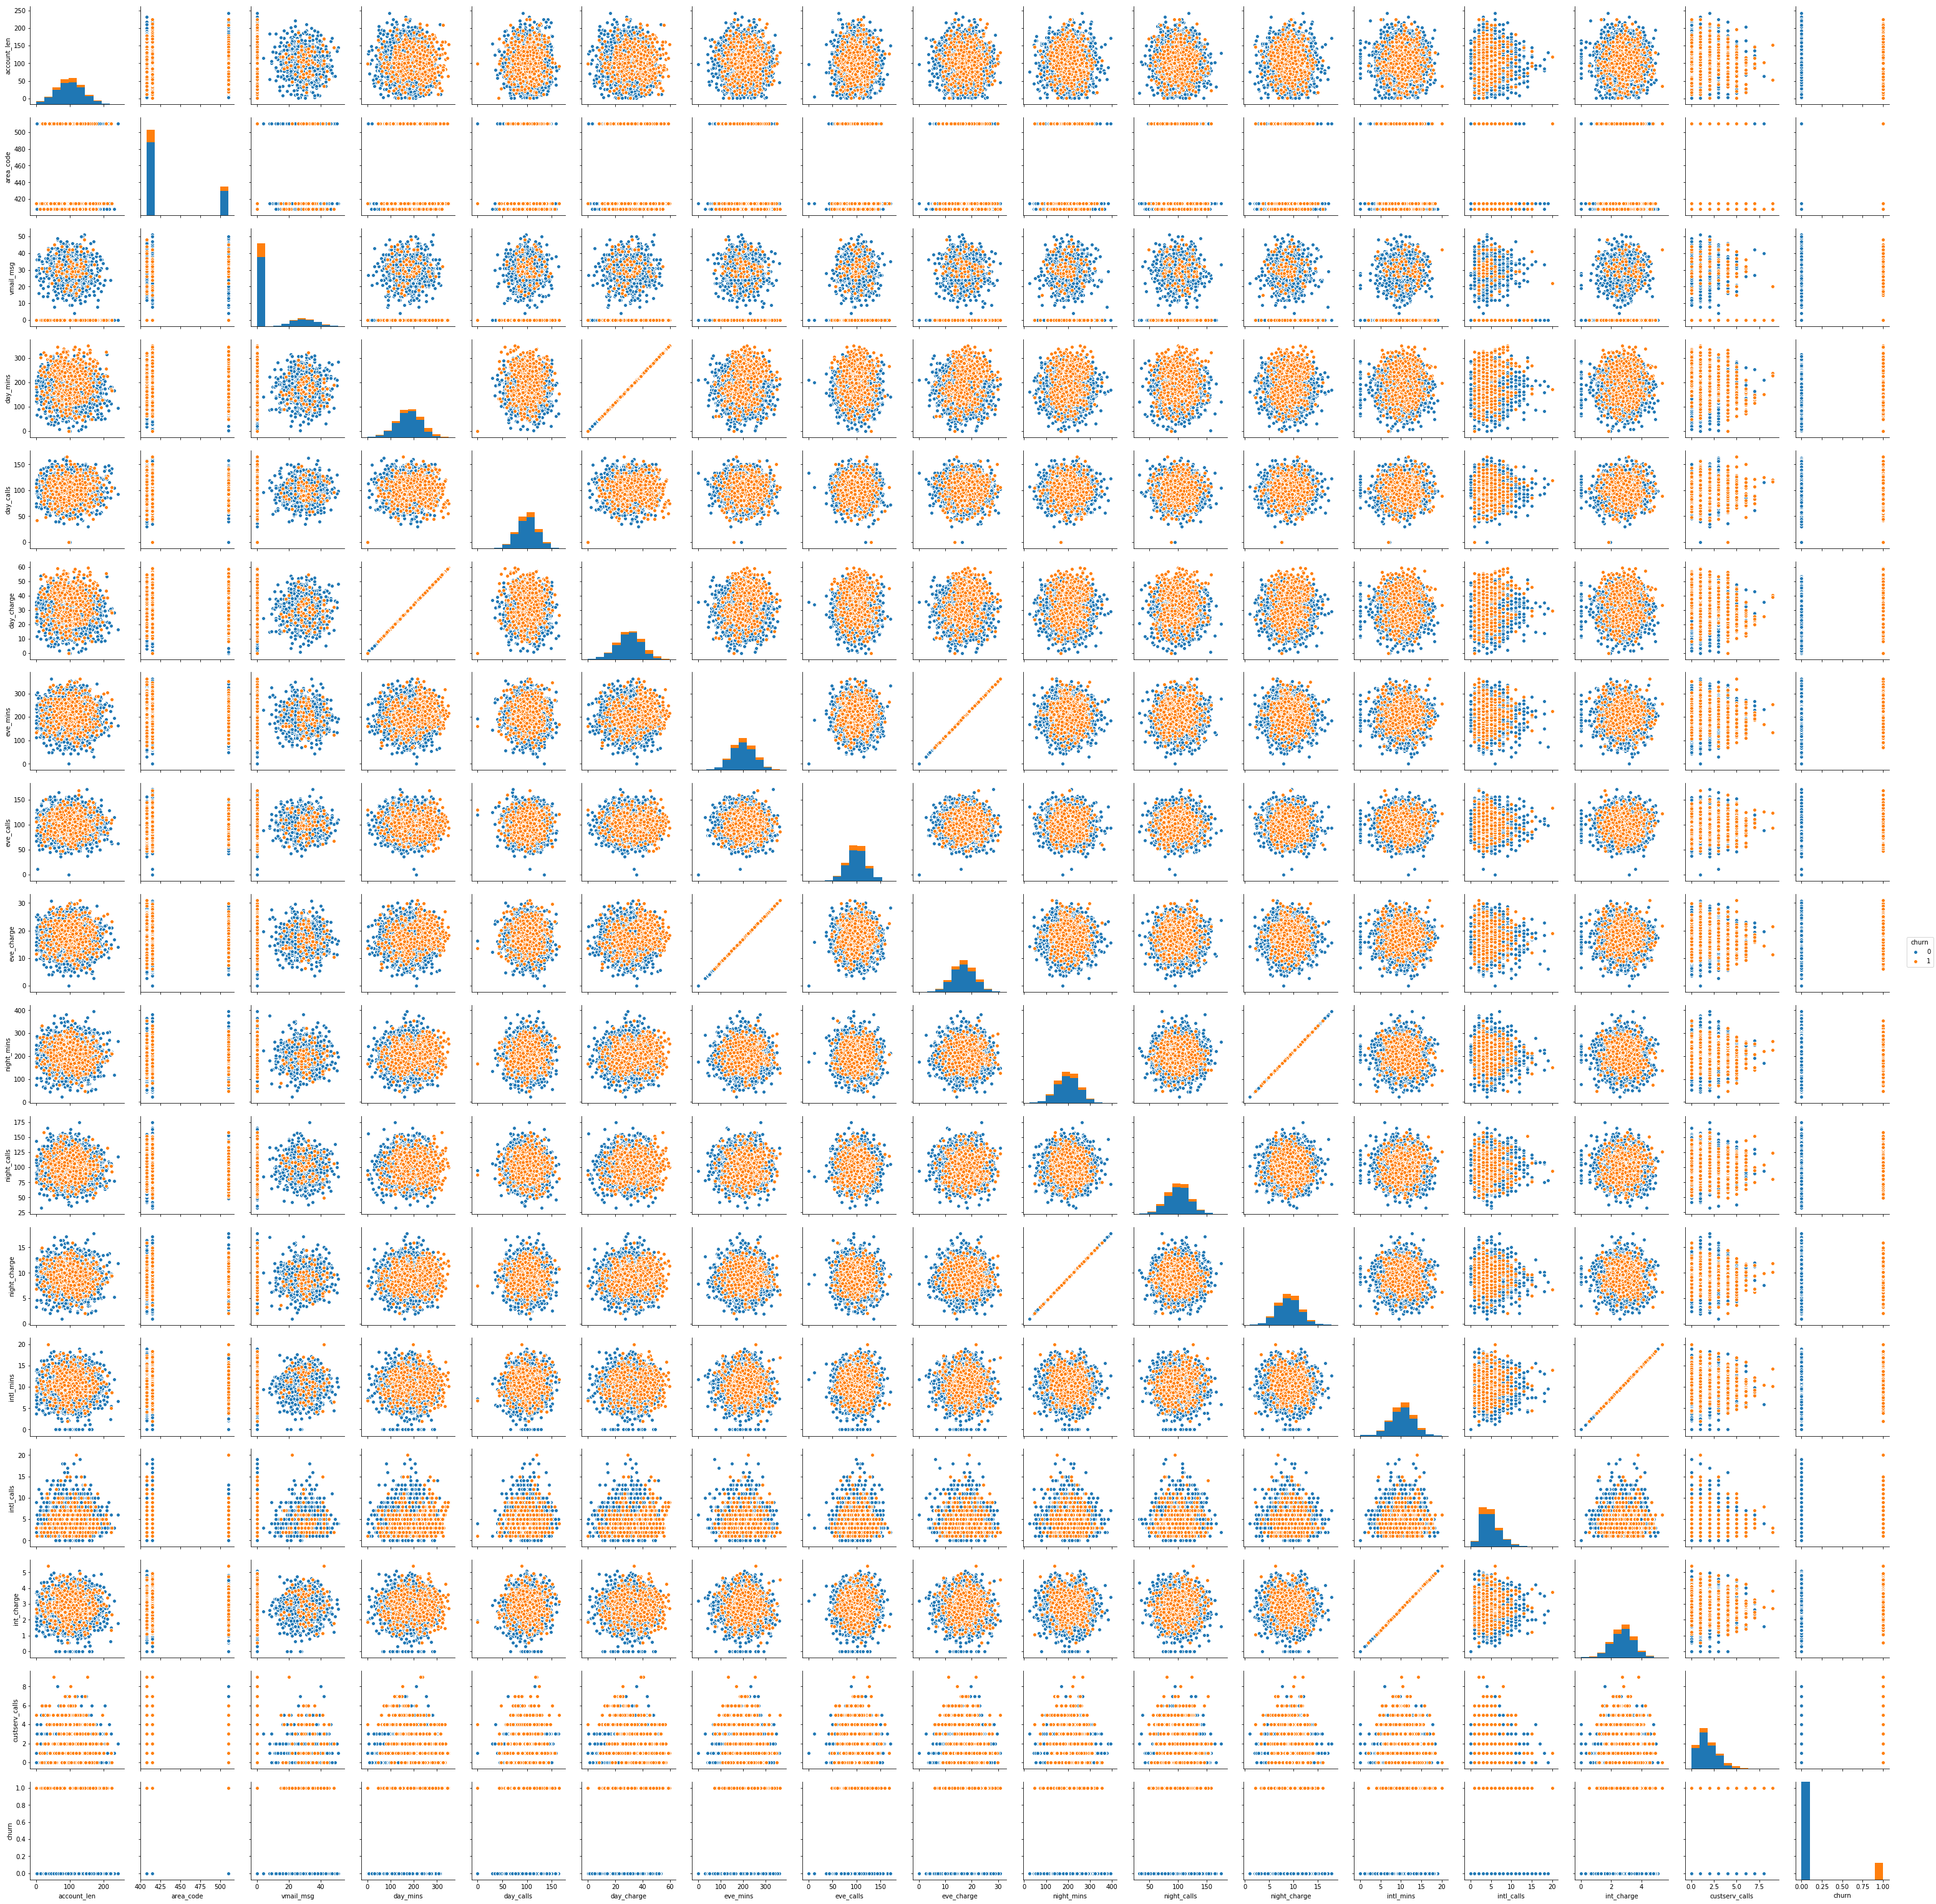

In [10]:
sns.pairplot(df,hue='churn')